In [11]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
np.random.seed(4867)

# Test drawing of colored distributed points and centroids

X-Shape: (500, 2)
Labels: (500,)
{'Centroid1': array([3.23868215, 3.75904118]), 'Centroid2': array([-8.69611452,  6.52702181]), 'Centroid3': array([-6.88999162,  8.74248182]), 'Centroid4': array([-2.03907079,  9.03276666])}


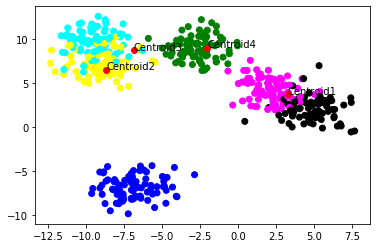

In [16]:
X, y = make_blobs(n_samples=500, centers=6, n_features=2, random_state=42, cluster_std=1.3)
c = ['green', 'black', 'blue', 'yellow', 'magenta', 'cyan']
labels = [c[y] for y in y]

k = 4

rand = [(np.random.randint(len(X)), np.random.randint(len(X))) for k in range(0, k)]
centroids = np.array([(X[rand[i][0]][0], X[rand[i][1]][1]) for i in range(0, k)])
centroids_dict = {"Centroid" + str(i + 1) : centroids[i] for i in range(0, len(centroids))}
centroid_names = [*centroids_dict.keys()]

print("X-Shape: " +str(X.shape))
print("Labels: " + str(y.shape))
print(centroids_dict)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red')
for i, centroid in enumerate(centroid_names):
    plt.annotate(centroid, (centroids[i,0], centroids[i,1])) 

# First iteration after applying the clustering algorithm

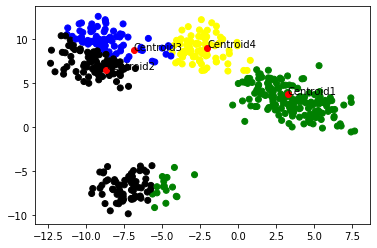

In [17]:
new_labels = []
colors = {("Centroid" + str(i)) : c[i-1] for i in range(1, k+1)}
point_to_centroid = {name : [] for name in centroid_names}

for point in X:
    dists = {"Centroid" + str(i + 1) : 0 for i in range(0, len(centroids))}
    for centroid in centroids_dict:
        dists[centroid] = np.linalg.norm((centroids_dict[centroid] - point))
        
    min_dist = min(dists, key=dists.get)
    new_labels.append(colors[min_dist])
    point_to_centroid[min_dist].append(point)
    
    
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=new_labels)
ax.scatter(centroids[:,0], centroids[:,1], c='red')
for i, centroid in enumerate(centroid_names):
    ax.annotate(centroid, (centroids[i,0], centroids[i,1]))
plt.show()

# Clustering Algorithm in one function

In [4]:
def calculate_clustering(samples, centers, centroids_num, max_iterations, cluster_std):
    
    X, y = make_blobs(n_samples=samples, centers=centers, n_features=2, random_state=42, cluster_std=cluster_std)
    
    rand = [(np.random.randint(len(X)), np.random.randint(len(X))) for n in range(0, centroids_num)]
    centroids = np.array([(X[rand[i][0]][0], X[rand[i][1]][1]) for i in range(0, centroids_num)])
    centroids_dict = {"Centroid" + str(i + 1) : centroids[i] for i in range(0, centroids_num)}
    centroid_names = [*centroids_dict.keys()]
    
    colors = {("Centroid" + str(i)) : c[i-1] for i in range(1, centroids_num + 1)}
    labels = [c[y] for y in y]
    
    counter = 3
    j = 0
    x = int(max_iterations / counter)
    
    fig = plt.figure(figsize=(16,12))
    ax = fig.subplots(x, counter)
    
    for i in range(0, max_iterations):
        
        if(counter == 0):
            counter = 3
            j = j + 1    
        m = i % 3
        
        if(i == 0):
            ax[0,0].set_title("Iteration: 1")
            ax[0,0].scatter(X[:,0], X[:,1], c=labels)
            ax[0,0].scatter(centroids[:,0], centroids[:,1], c='red')

            for a, centroid in enumerate(centroid_names):
                ax[0,0].annotate(centroid, (centroids[a,0], centroids[a,1]))
        else:
            new_labels = []
            colors = {("Centroid" + str(i)) : c[i-1] for i in range(1, centroids_num + 1)}
            point_to_centroid = {name : [] for name in centroid_names}

            for point in X:
                dists = {"Centroid" + str(i + 1) : 0 for i in range(0, centroids_num)}
                for centroid in centroids_dict:
                    dists[centroid] = np.linalg.norm((centroids_dict[centroid] - point))
        
                min_dist = min(dists, key=dists.get)
                new_labels.append(colors[min_dist])
                point_to_centroid[min_dist].append(point)
                
            new_centroids = np.array([np.array(point_to_centroid[centroid]).mean(axis=0) for centroid in centroids_dict])
            
            for b, centroid in enumerate(centroids_dict):
                centroids_dict[centroid] = new_centroids[b]
        
            ax[j, m].set_title("Iteration: " + str(i+ 1))
            ax[j, m].scatter(X[:,0], X[:,1], c=new_labels)
            ax[j, m].scatter(new_centroids[:,0], new_centroids[:,1], c='red')

            for k, centroid in enumerate(centroid_names):
                ax[j,m].annotate(centroid, (new_centroids[k,0], new_centroids[k,1])) 
        
        if(i == max_iterations - 1):
            sns.clustermap(X, figsize=(6, 8), method="single", row_colors=new_labels, standard_scale=1)
        counter = counter - 1

## Calculate Test set and heatmap at the end

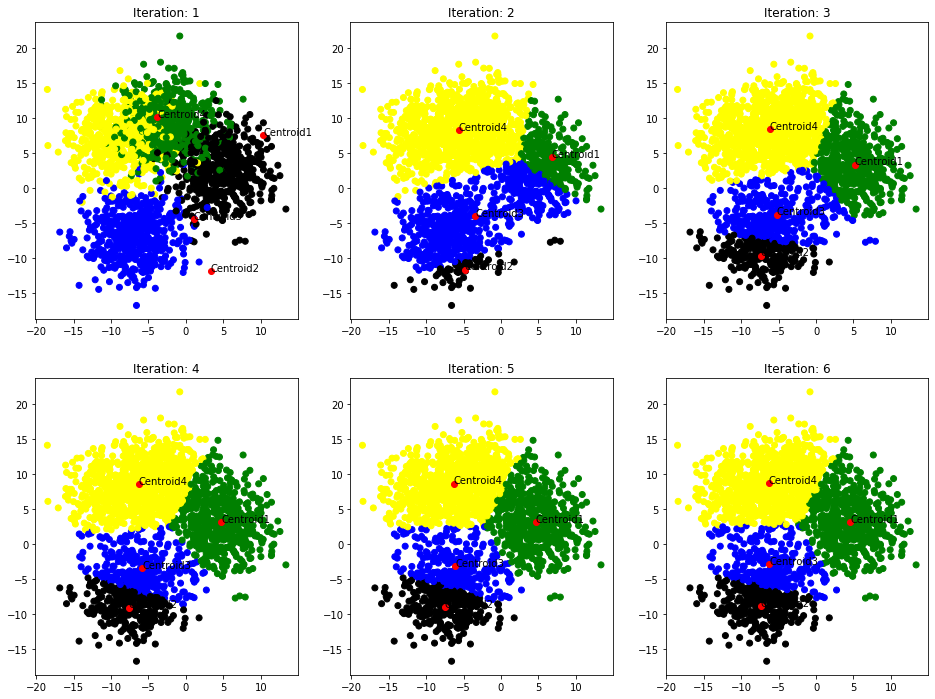

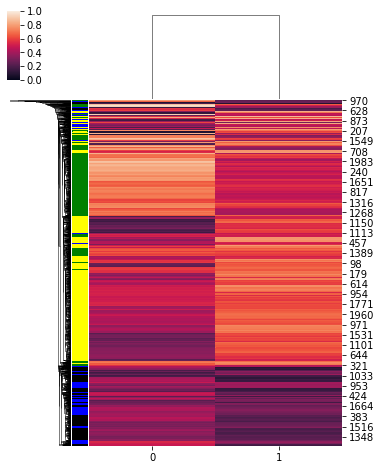

In [6]:
calculate_clustering(samples=2000, centers=4, centroids_num=4, max_iterations=6, cluster_std=3.3)